# PST DOMÁCÍ ÚLOHA - SKORE KREATIVITY DLE TYPU MOTIVACE

In [1]:
K = 4
L = 7
M = ((K+L)*47) % 11 + 1
print(f'M = {M}')

M = 1


V našem případě budeme pracovat s datasetem č.1

## Úkol 1

##### Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

Importujeme potřebné knihovny

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm, expon, uniform, t
import math

Načítame data z csv-souboru a podívíáme se na informace o nich

In [3]:
df = pd.read_csv('data.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  47 non-null     object 
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


None

,Unnamed: 0,Unnamed: 1
0,NaN,1 5.000000 Extrinsic
1,NaN,2 5.400000 Extrinsic
2,NaN,3 6.100000 Extrinsic
3,NaN,4 10.900000 Extrinsic
4,NaN,5 11.800000 Extrinsic


Dělame parsing pro vytvoření příslušných slopců

In [4]:
df = df.rename(columns={'Unnamed: 1' : 'Data'})
data = []
count = 0

for tmp in df['Data']:
    data.append([])
    tmp = str(tmp).split(' ')
    for x in tmp:
        if x != '':
            data[count].append(x)
    count += 1

digital_data = []
treatment = []
for x in data:
    digital_data.append(float(x[1]))
    treatment.append(x[2])
    
df = df.drop('Data', axis=1)
df['Data'] = digital_data
df['Treatment'] = treatment

In [5]:
df = df.drop(columns=["Unnamed: 0"])

In [6]:
display(df.head())
display(df.tail())

,Data,Treatment
0,5.0,Extrinsic
1,5.4,Extrinsic
2,6.1,Extrinsic
3,10.9,Extrinsic
4,11.8,Extrinsic


,Data,Treatment
42,23.100000,Intrinsic
43,24.000000,Intrinsic
44,24.299999,Intrinsic
45,26.700001,Intrinsic
46,29.700001,Intrinsic


Vidíme, že v našem datasetu jsou 2 skupiny dat: vnější a vnitřní. Rozdělíme tedy ho na 2 příslušné datasety

In [7]:
extrinsic = df[df['Treatment'] == 'Extrinsic']
intrinsic = df[df['Treatment'] == 'Intrinsic']

In [8]:
def analyse_dataset(dataset):
    display(dataset.head())
    print(f'Velikost datasetu - {dataset.shape[0]}')

analyse_dataset(extrinsic)
analyse_dataset(intrinsic)

,Data,Treatment
0,5.0,Extrinsic
1,5.4,Extrinsic
2,6.1,Extrinsic
3,10.9,Extrinsic
4,11.8,Extrinsic


Velikost datasetu - 23


,Data,Treatment
23,12.0,Intrinsic
24,12.0,Intrinsic
25,12.9,Intrinsic
26,13.6,Intrinsic
27,16.6,Intrinsic


Velikost datasetu - 24


Ted odhadneme střední hodnotu, rozptyl a medián pro každý vytvořený dataset.

Víme, že odhadem střední hodnoty je výběrový průměr. Použijeme funkci .mean() z Pandas

In [9]:
def mean_value(data):
    return data.mean()

print(f"Odhad střední hodnoty rozdělení Extrinsic - {mean_value(extrinsic['Data'])}")
print(f"Odhad střední hodnoty rozdělení Intrinsic - {mean_value(intrinsic['Data'])}")

Odhad střední hodnoty rozdělení Extrinsic - 15.739130695652173
Odhad střední hodnoty rozdělení Intrinsic - 19.883333333333333


Odhadem rozptylu rozdělení je výběrový rozptyl. Použijeme funkci .var() z Pandas

In [10]:
def variance_value(data):
    return data.var()

print(f"Odhad rozptylu rozdělení Extrinsic - {variance_value(extrinsic['Data'])}")
print(f"Odhad rozptylu rozdělení Intrinsic - {variance_value(intrinsic['Data'])}")

Odhad rozptylu rozdělení Extrinsic - 27.58976481541531
Odhad rozptylu rozdělení Intrinsic - 19.709276144927973


Pro výpočet mediánu každého rozdělení použijeme funkci .median() z Pandas

In [11]:
def median_value(data):
    return data.median()

print(f"Medián rozdělení Extrinsic - {median_value(extrinsic['Data'])}")
print(f"Medián rozptylu rozdělení Intrinsic - {median_value(intrinsic['Data'])}")

Medián rozdělení Extrinsic - 17.200001
Medián rozptylu rozdělení Intrinsic - 20.3999995


## Úkol 2

##### Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce

Píšeme vhodnou funkci pro vykreslení odhad hustoty a zároven distribuční funkce. Pro vykreslení odhadu hustoty použijeme funkci .plot.kde(). Pro vykreselení empirické distribuční funkce použijeme .plot.hist() s nastáveným parametrem cumulative na True.

In [12]:
def approx_plots(data, name):
    print(f'Příslušné vizualizace pro rozdělení {name}')
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    density = data.plot.kde(ax=axs[0], legend=False)
    axs[0].set_title(f'Density Plot {name}')
    axs[0].set_xlabel('Data')
    
    distribution_function = data.plot.hist(cumulative = True, ax=axs[1], density = True, edgecolor='black', legend=False, color='lightblue')
    axs[1].set_title(f'Empirical Distribution Plot {name}')
    axs[1].set_xlabel('Data')

Příslušné vizualizace pro rozdělení Extrinsic


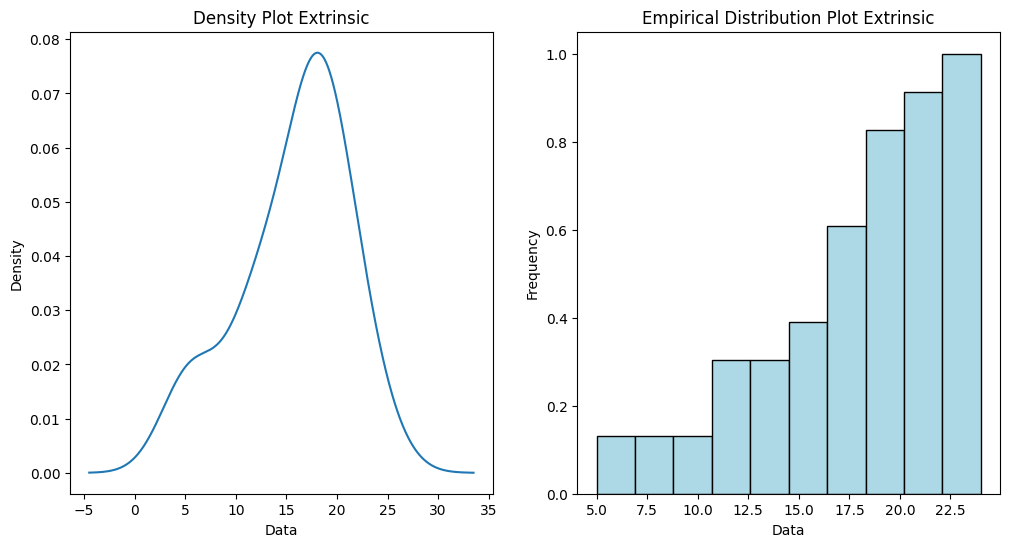

In [13]:
approx_plots(extrinsic, 'Extrinsic')

Příslušné vizualizace pro rozdělení Intrinsic


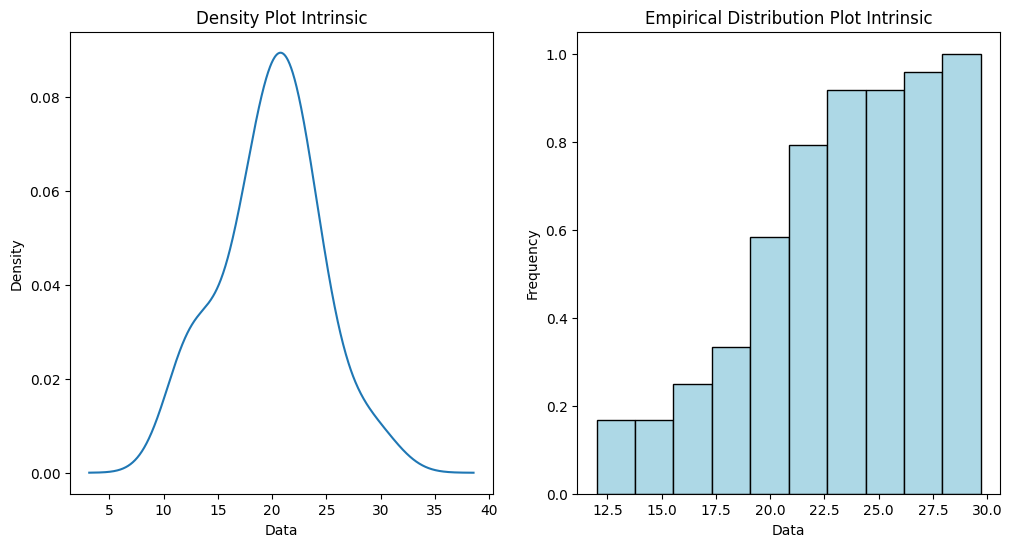

In [14]:
approx_plots(intrinsic, 'Intrinsic')

## Úkol 3

##### Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

In [15]:
def compareDistributions(data):
    # Odhad parametrů normálního rozdělení
    mu = np.mean(data)
    std = np.std(data)
    
    # Odhad parametru exponenciálního rozdělení
    lambda_param = 1 / mu
    
    # Odhad parametrů rovnoměrného rozdělení
    a = np.min(data)
    b = np.max(data)
    
    # Vytvoření dat pro grafy hustot
    x = np.linspace(np.min(data), np.max(data), 1000)
    pdf_normal = norm.pdf(x, mu, std)
    pdf_exponential = expon.pdf(x, scale=1/lambda_param)
    pdf_uniform = uniform.pdf(x, loc=a, scale=b-a)
    
    plt.figure(figsize=(12, 12))
    
    # Vytvoření histogramu
    plt.hist(data, bins=9, density=True, alpha=0.7, label='Histogram dat')
    
    # Vložení odhadnutých hustot do grafu
    plt.plot(x, pdf_normal, 'r', label=f'Normální, μ={mu:.2f}, σ={std:.2f}')
    plt.plot(x, pdf_exponential, 'g', label=f'Exponenciální, λ={lambda_param:.2f}')
    plt.plot(x, pdf_uniform, 'b', label=f'Rovnoměrné, a={a:.2f}, b={b:.2f}')
    
    # Přidání popisků a legendy
    plt.title('Hustoty rozdělení')
    plt.xlabel('Hodnota')
    plt.ylabel('Hustota pravděpodobnosti')
    plt.legend()
    
    # Zobrazení grafu
    plt.show()

Tato funkce ``compareDistributions`` přijímá data a provádí analýzu s cílem porovnat histogram dat s hustotami odhadnutými pro normální, exponenciální a rovnoměrné rozdělení pomocí momentové metody.

Stručný popis:

1. Odhad parametrů:
    * Funkce začíná odhadem parametrů pro normální, exponenciální a rovnoměrné rozdělení na základě momentové metody.
2. Vytvoření dat pro grafy hustot:
    * Pro každé odhadnuté rozdělení se vytváří data pro graf hustot pravděpodobnosti.
3. Vytvoření histogramu:
    * Používá se funkce plt.hist pro vytvoření histogramu dat s určeným počtem binů.
4. Vložení odhadnutých hustot do grafu:
    * Přidávají se křivky hustot odhadnutých rozdělení na základě momentové metody.

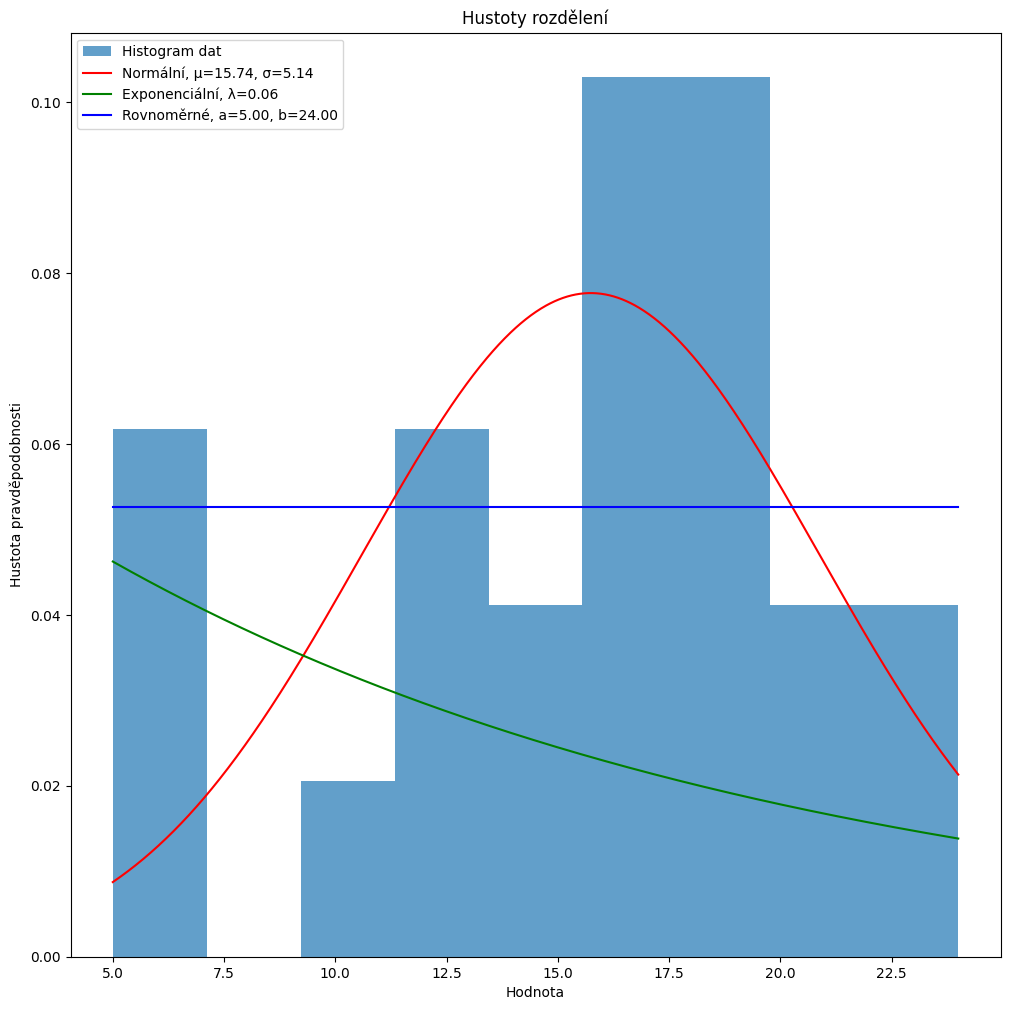

In [16]:
compareDistributions(extrinsic["Data"])

* Vizuální analýza naznačuje, že pozorovaná data nejvíce odpovídají normálnímu rozdělení. 
* Tvar rozdělení připomíná symetrickou zvoničku. 
* Data mají tendenci se hromadit kolem střední hodnoty, přičemž hodnoty na obou stranách jsou podobné. 

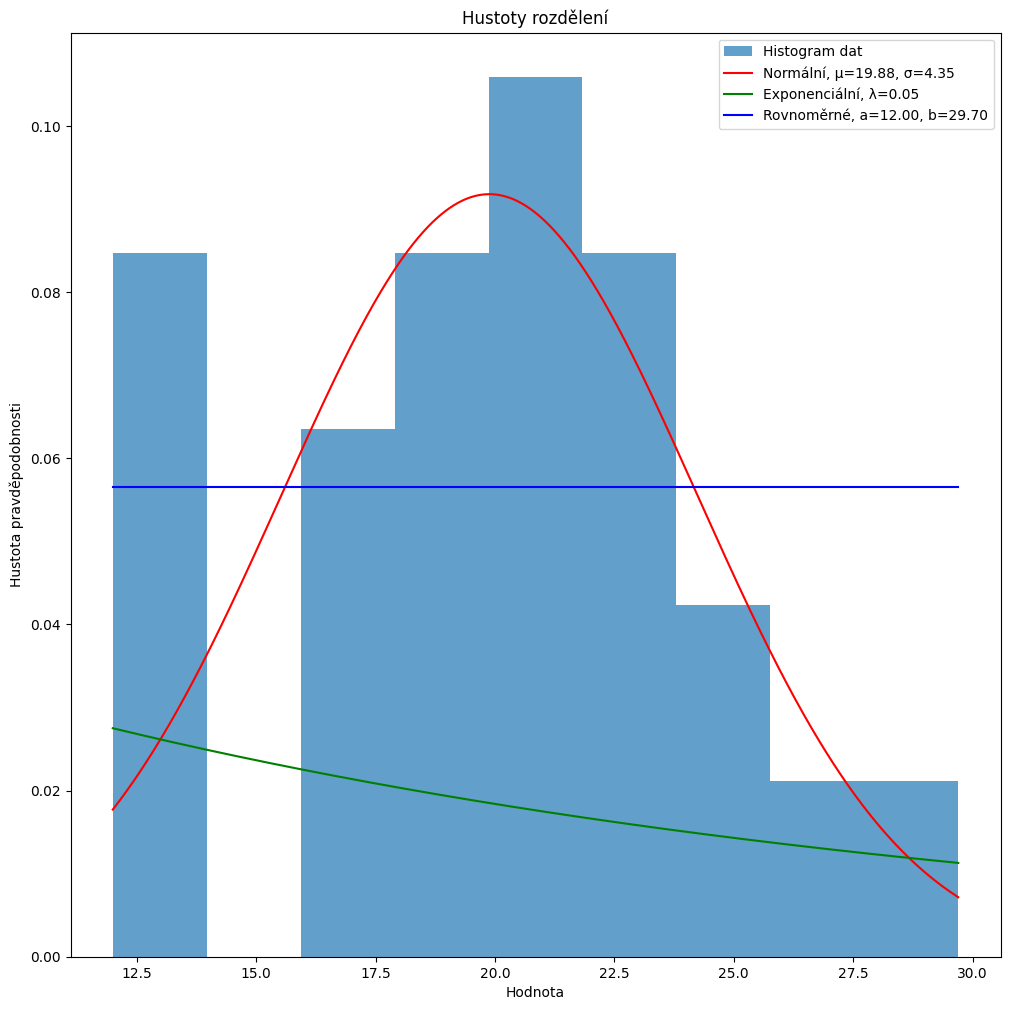

In [17]:
compareDistributions(intrinsic["Data"])

* Vizuální analýza naznačuje, že pozorovaná data nejvíce odpovídají normálnímu rozdělení. 
* Tvar rozdělení připomíná symetrickou zvoničku. 
* Data mají tendenci se hromadit kolem střední hodnoty, přičemž hodnoty na obou stranách jsou podobné. 

## Úkol 4

##### Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

Z předchozízo zadání víme, že naše data mají normální rozdělení. A proto na generaci dat použijeme funkci numpy.random.normal() s následujíci parametry: střední hodnota, směrodatná odchylka a počet dat.

In [18]:
def random_generate(data):
    mu = mean_value(data['Data'])
    sigma = np.sqrt(variance_value(data['Data']))

    random_data = np.random.normal(mu, sigma, 100)
    return random_data

In [19]:
random_extrinsic = random_generate(extrinsic)
random_intrinsic = random_generate(intrinsic)

Po generování dat, porovnáme histogramy původních dat s simulovanými. Pro viditelnost také nakreslíme grafy normálního rozdělení pro každý případ

In [20]:
def gaussian_plot(mu, sigma, axis,):
    x_min, x_max = axis.get_xlim()
    vector = np.linspace(x_min, x_max, 100)
    vector_plot = norm.pdf(vector, mu, sigma)
    
    axis.plot(vector, vector_plot, color='blue')

In [21]:
def compare_data(original_data, random_data, name):
    mu = mean_value(original_data['Data'])
    sigma = np.sqrt(variance_value(original_data['Data']))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].hist(original_data['Data'], density = True,color = 'lightgreen', edgecolor = 'black', bins=6)
    axs[1].hist(random_data, density = True, color = '#ea7ef6', edgecolor = 'black', bins=9)

    gaussian_plot(mu, sigma, axs[0])
    gaussian_plot(mu, sigma, axs[1])

    axs[0].set_xlabel('Data')
    axs[1].set_xlabel('Data')

    axs[0].set_title(f'Original Data {name}')
    axs[1].set_title(f'Random Data {name}')

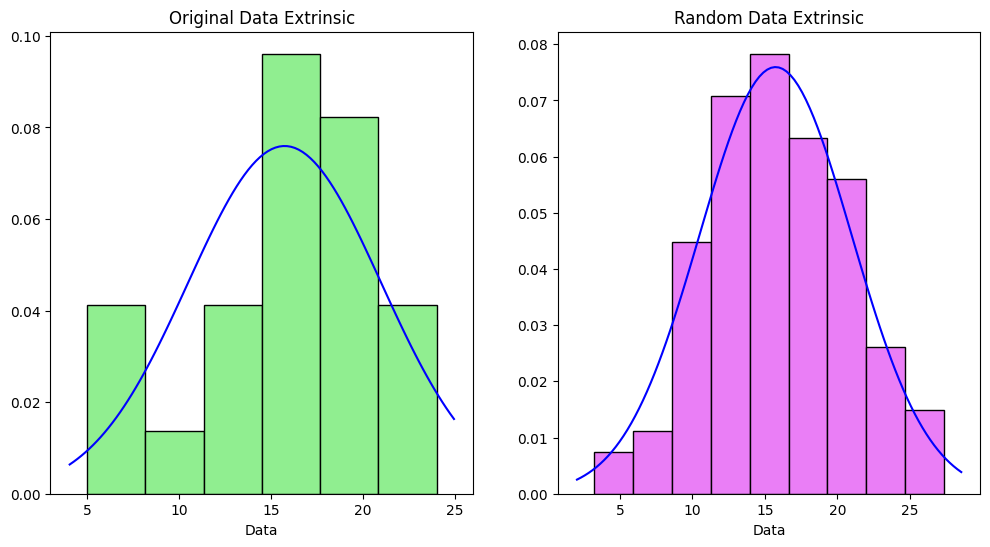

In [22]:
compare_data(extrinsic, random_extrinsic, 'Extrinsic')

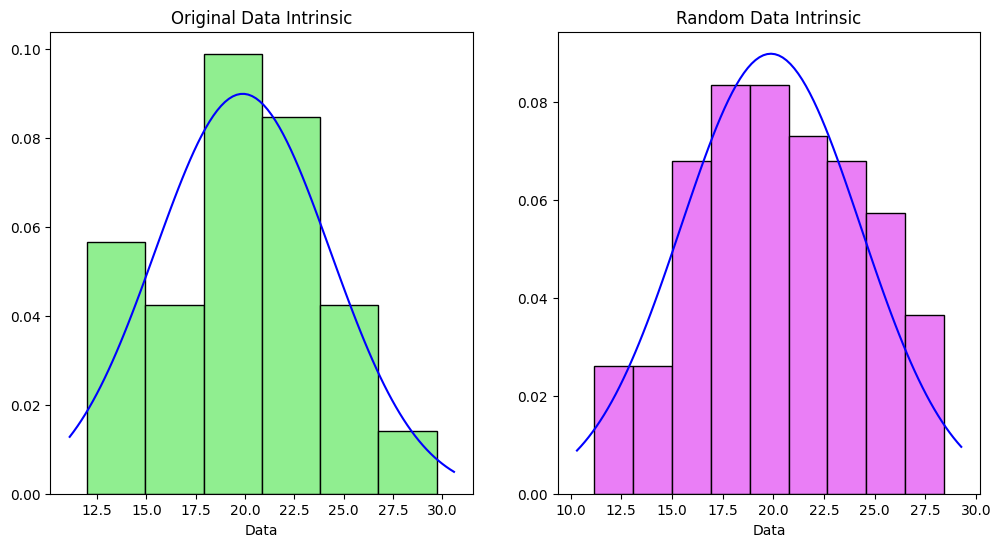

In [23]:
compare_data(intrinsic, random_intrinsic, 'Intrinsic')

Po vykreslení histogramů původních a generovaných dat můžeme udělat závěr, že naše data skutečně mají normální rozdělení.

## Úkol 5

##### Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [24]:
def confidence_interval(data, confidence=0.95):
    # Spočítá průměr a standardní odchylku
    mean = np.mean(data)
    std = np.std(data)

    # Počet pozorování
    n = len(data)

    # Společný odhad standardní chyby
    se = std / np.sqrt(n)

    # Kritická hodnota
    t_value = t.isf((1 - confidence) / 2, df=n - 1)

    # Meze intervalu
    lower_bound = mean - t_value * se
    upper_bound = mean + t_value * se

    return lower_bound, upper_bound

Funkce ``confidence_innterval`` vypočítá oboustranný 95% konfidenční interval pro střední hodnotu dat pomocí Studentova t-rozdělení.

In [25]:
def visualize_confidence_interval(data, confidence=0.95):
    # Spočítá konfidenční interval
    interval = confidence_interval(data, confidence)

    plt.figure(figsize=(12, 12))
    
    # Vytvoří histogram dat
    plt.hist(data, bins=9, alpha=0.7, density=True, label='Histogram dat')

    # Vloží vertikální čáry pro konfidenční interval
    plt.axvline(interval[0], color='red', linestyle='dashed', linewidth=2, label='Dolní hranice CI')
    plt.axvline(interval[1], color='red', linestyle='dashed', linewidth=2, label='Horní hranice CI')
    
    plt.title('Konfidenční interval pro střední hodnotu')
    plt.xlabel('Hodnota')
    plt.ylabel('Hustota pravděpodobnosti')
    plt.legend()

    plt.show()

Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu extrinsic: (13.517664671761311, 17.960596719543037)


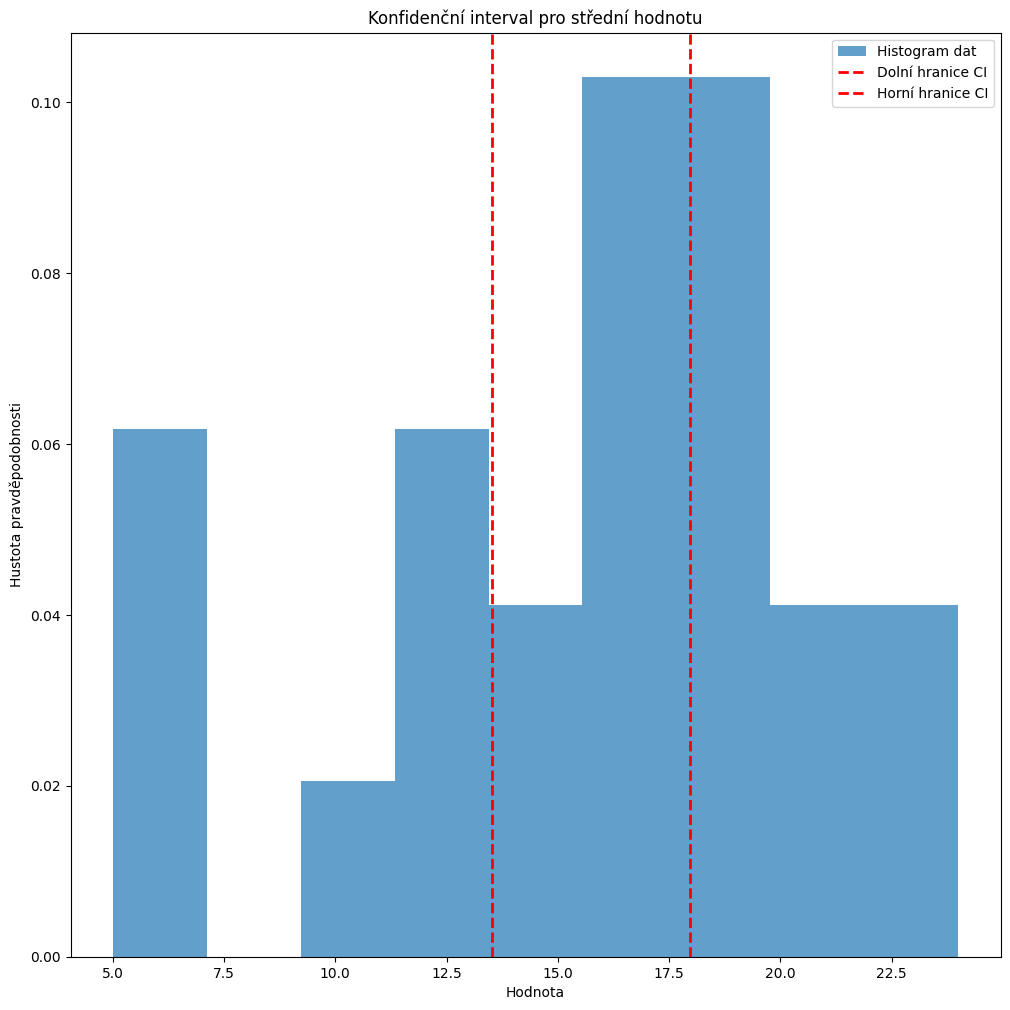

In [26]:
print(f'Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu extrinsic: {confidence_interval(extrinsic["Data"])}')
visualize_confidence_interval(extrinsic["Data"])

Výsledek udává oboustranný 95% konfidenční interval pro střední hodnotu skupiny označené jako "extrinsic". Konkrétně, interval je (13.52, 17.96), což znamená, že s 95% pravděpodobností lze očekávat, že skutečná hodnota střední hodnoty této skupiny je někde v tomto intervalu.

Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu intrinsic: (18.048161948716626, 21.71850471795004)


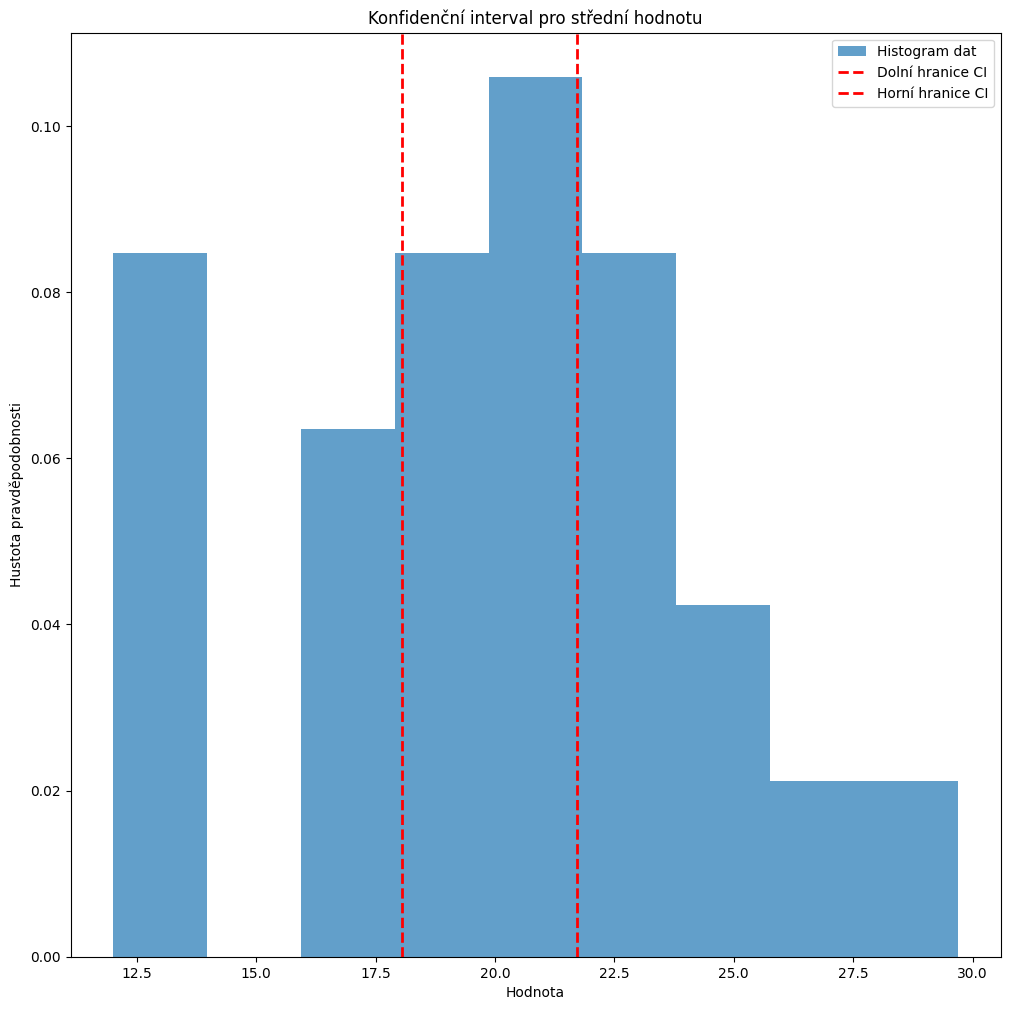

In [27]:
print(f'Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu intrinsic: {confidence_interval(intrinsic["Data"])}')
visualize_confidence_interval(intrinsic["Data"])

Výsledek udává oboustranný 95% konfidenční interval pro střední hodnotu skupiny označené jako "intrinsic": (18.05, 21.72). Tento interval znamená, že s 95% pravděpodobností lze očekávat, že skutečná hodnota střední hodnoty této skupiny je někde v tomto rozmezí.